In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('chifoumy/data/chifoumi-dataset.csv')
df.head()

,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,...,17y,18x,18y,19x,19y,20x,20y,21x,21y,target
0,0.972548,0.503541,0.888238,0.670902,0.766331,0.698617,0.688033,0.595593,0.653848,0.487888,...,0.439262,0.785297,0.249039,0.682782,0.291712,0.707206,0.337388,0.752084,0.343444,2
1,0.883314,0.585556,0.758897,0.738274,0.619175,0.731899,0.540562,0.609661,0.514005,0.497798,...,0.516720,0.639559,0.312580,0.554995,0.351059,0.577250,0.405897,0.619907,0.421913,2
2,0.910765,0.598994,0.836391,0.407034,0.722001,0.359720,0.642534,0.440818,0.602230,0.552093,...,0.562702,0.660576,0.772937,0.619692,0.700938,0.657051,0.666762,0.697424,0.658073,2
3,0.942804,0.452263,0.843116,0.593405,0.718336,0.579437,0.654337,0.451111,0.632054,0.341280,...,0.299582,0.769897,0.152735,0.655527,0.150431,0.675466,0.203113,0.716827,0.225120,2
4,0.916129,0.525466,0.825934,0.410975,0.722051,0.406688,0.660051,0.489497,0.622740,0.590304,...,0.635309,0.720663,0.833326,0.715275,0.790811,0.755227,0.748631,0.783695,0.725269,2


In [3]:
df.shape

(2049, 43)

In [4]:
df.describe()

,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,...,17y,18x,18y,19x,19y,20x,20y,21x,21y,target
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,0.882017,0.492025,0.798510,0.608148,0.674112,0.643569,0.567116,0.621330,0.502557,0.593399,...,0.456958,0.627949,0.365591,0.540699,0.381507,0.533654,0.398570,0.537180,0.401143,1.004880
std,0.091499,0.125221,0.094683,0.146058,0.101158,0.192730,0.111130,0.197508,0.120820,0.203834,...,0.126941,0.109267,0.236114,0.100592,0.211332,0.120850,0.197042,0.157319,0.195244,0.811884
min,0.467607,-0.147117,0.458707,-0.070512,0.304918,0.010352,0.157513,0.013287,0.054466,-0.090281,...,0.087641,0.177650,-0.035256,0.082736,-0.033415,0.059194,-0.028786,-0.020457,-0.061911,0.000000
25%,0.828709,0.415357,0.744916,0.525867,0.614309,0.563649,0.497591,0.504024,0.418720,0.445361,...,0.371936,0.561184,0.215488,0.474720,0.246018,0.441776,0.271980,0.395130,0.273821,0.000000
50%,0.889993,0.489420,0.800820,0.634368,0.675113,0.700494,0.568609,0.650704,0.500678,0.608632,...,0.439415,0.632708,0.280064,0.534814,0.308624,0.532049,0.338879,0.558578,0.345064,1.000000
75%,0.943832,0.565252,0.858041,0.707623,0.734638,0.777069,0.633459,0.768354,0.583108,0.755680,...,0.529573,0.695902,0.408150,0.601305,0.420603,0.617025,0.458617,0.654663,0.470131,2.000000
max,1.140496,1.065905,1.050855,0.957176,0.976205,1.023172,0.952377,1.035136,0.951332,1.121013,...,0.957561,0.968650,1.063550,0.884594,1.078582,0.926034,1.140382,0.958110,1.192943,2.000000


In [5]:
data = df.copy()

In [6]:
X = data.drop(columns = 'target')
y = data['target']

In [7]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model_tree_class = DecisionTreeClassifier()
base_tree = cross_validate(model_tree_class, X_train, y_train, cv = 5, scoring = 'accuracy')
base_tree

{'fit_time': array([0.01241994, 0.00951624, 0.01025701, 0.0086031 , 0.01109982]),
 'score_time': array([0.00021887, 0.00012779, 0.00012493, 0.00012279, 0.00012589]),
 'test_score': array([0.98701299, 0.99022801, 0.98697068, 0.98371336, 0.99022801])}

In [10]:
base_tree['test_score'].mean()

0.9876306104319135

In [11]:
%%time
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy import stats

# Instanciate model
model = model_tree_class

# Hyperparameter search space
search_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'min_samples_leaf' : [0.1, 0.5, 1, 2, 5],
    'min_samples_split' : [0.1, 0.5, 2, 5, 10]
}

# Instanciate Random Search
rsearch = GridSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=5, verbose=0)


rsearch.fit(X_scaled,y)

CPU times: user 342 ms, sys: 156 ms, total: 498 ms
Wall time: 2.66 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [0.1, 0.5, 1, 2, 5],
                         'min_samples_split': [0.1, 0.5, 2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [12]:
rsearch.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

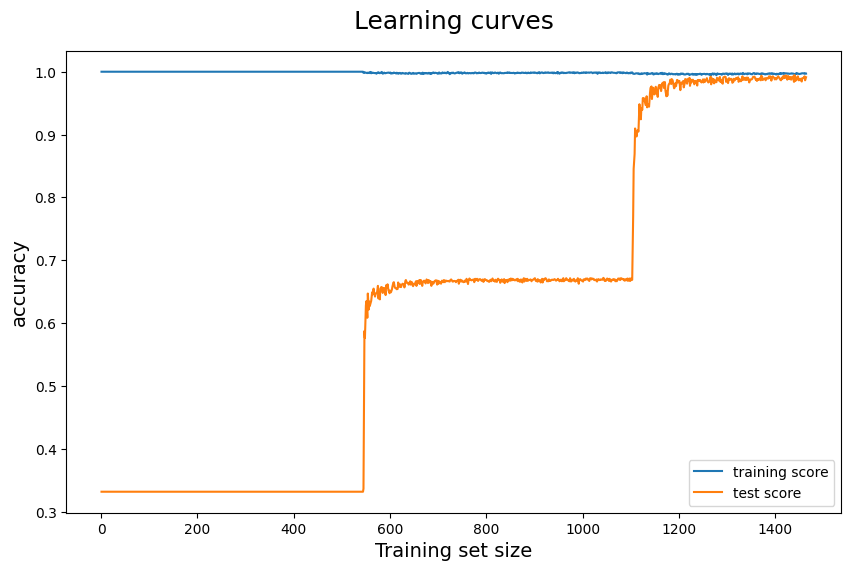

In [13]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# create the training size slices
train_sizes = np.linspace(1,1464, num = 1000, dtype='int')

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(\
                                                        estimator = DecisionTreeClassifier(criterion = 'entropy',\
                                                                                        min_samples_leaf = 2,
                                                                                        min_samples_split = 2,
                                                                                        splitter = 'random'),
                                                        X = X_scaled, 
                                                        y = y,
                                                        scoring = 'accuracy',
                                                        train_sizes = train_sizes, 
                                                        cv = 5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [14]:
X_train

array([[0.34236527, 0.63094538, 0.27485616, ..., 0.5922922 , 0.56151607,
        0.56938693],
       [0.5681019 , 0.34301936, 0.54657399, ..., 0.17279206, 0.28996719,
        0.19322455],
       [0.579789  , 0.91489756, 0.68543515, ..., 0.79996458, 0.33421334,
        0.72589863],
       ...,
       [0.52884518, 0.39114363, 0.52430797, ..., 0.25618397, 0.60662952,
        0.25325175],
       [0.5244407 , 0.40433151, 0.46095213, ..., 0.20403599, 0.63023378,
        0.22149924],
       [0.87738299, 0.44325635, 0.9612687 , ..., 0.25825005, 0.93668367,
        0.26500257]])

In [15]:
from sklearn.linear_model import Ridge, Lasso

DTree = DecisionTreeClassifier().fit(X_train, y_train)
ridge = Ridge(alpha=0.2).fit(X_train, y_train)
lasso = Lasso(alpha=0.2).fit(X_train, y_train)

coefs = pd.DataFrame({
    # "coef_linreg": pd.Series(DTree.coef_, index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index = X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,coef_ridge,coef_lasso
1x,0,0
1y,0,0
2x,0,0
2y,0,0
3x,0,0
3y,0,0
4x,0,0
4y,0,0
5x,0,0
5y,0,0


In [16]:
%%time
model_tree_class = DecisionTreeClassifier(criterion = 'entropy',\
                                          min_samples_leaf = 2,
                                          min_samples_split = 2,
                                          splitter = 'random').fit(X_train, y_train)
y_pred = model_tree_class.predict(X_test)

CPU times: user 13.5 ms, sys: 3.22 ms, total: 16.7 ms
Wall time: 4.05 ms


In [17]:
results_df = pd.DataFrame({"actual": y_test,
                           "predicted": y_pred}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])

In [18]:
confusion_matrix

predicted,0,1,2
actual,,,
0,159,3,3
1,0,159,3
2,0,0,186


In [19]:
X_test.shape, y_test.shape

((513, 42), (513,))

In [21]:
score = cross_validate(model_tree_class, X_train, y_train, scoring='accuracy')

In [22]:
score['test_score'].mean()

0.9882820762299589